In [10]:
from sciml.model.fno import FNO
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
nb_xi = 2 # can be deduced from mu because it's len(mu.shape) - 1
p_1 = 20 # dimension of scheme for xi for all i
p_2 = 20 # dimension of scheme for xi for all i
p_3 = 20 # dimension of scheme for xi for all i
epochs = 300 
index = 10
n_modes = 11
n_layers = 3


activation = 'relu'
kernel_initializer = 'he_normal'
device = "GPU"
n_epochs = epochs


In [12]:
# inputs are of the form [batch, p_1, p_1, nd_xi +1] for nb_xi=2 (+1 because of the mu=f(x))

first_network = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(p_1, p_1,)),  # [batch, p_1, p_1, 3]
    tf.keras.layers.Flatten(),  # [batch, p_1*p_1*3]
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(p_1 * p_1, activation='relu'),
    tf.keras.layers.Reshape((p_1, p_1,))  # [batch, p_1, p_1, p_2]
])

last_network = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(p_1, p_1,)),  # [batch, p_1, p_1, 3]
    tf.keras.layers.Flatten(),  # [batch, p_1*p_1*3]
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(p_1 * p_1 * (1), activation='linear'),
    tf.keras.layers.Reshape((p_1, p_1,))  # [batch, p_1, p_1, 3]
])

# first network graph:
# [batch, p_1, p_1, 3] -> [batch, p_1*p_1*3] -> [batch, 512] -> [batch, 256] -> [batch, p_1*p_1*p_2] -> [batch, p_1, p_1, p_2]
# last network graph:  
# [batch, p_1, p_1, 3] -> [batch, p_1*p_1*3] -> [batch, 256] -> [batch, 512] -> [batch, p_1*p_1*3] -> [batch, p_1, p_1, 3]

In [13]:
folder_path = "data/test_data/example_data_fno/heat2d/"

In [14]:
model = FNO(regular_params={"first_network": first_network, "last_network": last_network},fourier_params={"n_layers": n_layers, "dim_coords":2, "n_modes": n_modes, "activation": activation, "kernel_initializer": kernel_initializer}, hyper_params={"p_1": p_1, "p_2": p_2,'p_3':p_3,"device": device,"n_epochs":n_epochs,"index":index})

INFO:sciml.model.fno.fno:Model initialized with 300 epochs, 32 batch size, 0.001 learning rate


In [15]:
mus, sol = model.get_data(folder_path)

mu shape (40, 20, 20, 1)
inputs shape (40, 20, 20)


In [16]:
print(mus.shape)
print(sol.shape)

(40, 20, 20)
(40, 20, 20)


In [17]:
import os

tf.get_logger().setLevel('ERROR')


In [ ]:
train_history = model.fit()

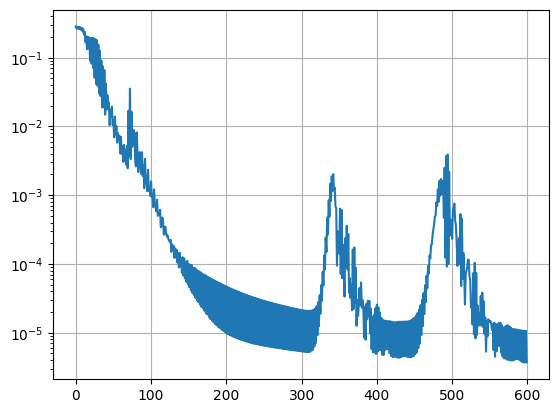

In [21]:
plt.plot(train_history)
plt.yscale('log')
plt.grid()
plt.show()